<font color='blue' size=6><b>Demo - Week 7 Worksheet Suggested Solutions</b></font>

In [32]:
###install.packages('dplyr',repos='https://cran.ma.imperial.ac.uk/')
library(dplyr)

In [33]:
###install.packages('ggpubr',repos='https://cran.ma.imperial.ac.uk/')
library(ggpubr)

<font color='blue' size=5><b> Suggested solutions to Part 1 (datafile hairpain) </b></font>

In [28]:
getwd()
hairpain<-read.table(file="../Data/hairpain.txt",sep=',',header = T)

[1] "C:/Users/C1504359/Dropbox/MAT022-Foundations-of-Statistics-and-Data-Science/labsolutions"

<font color='blue' size=3> A study has indicated that there may be a difference between the pain thresholds of blondes and
brunettes. Men and women of various ages were divided into four categories according to hair
colour: light blond, dark blond, light brown and dark brown. The purpose of the experiment
was to determine whether hair colour is related to the amount of pain evoked by common types
of mishaps and assorted types of trauma. Each person in the experiment was given a pain
threshold score based on his or her performance in a pain sensitivity test (the higher the score,
the higher the person’s pain tolerance). </font>

In [19]:
summary(hairpain)

          haircolour   painthresh   
 Dark-Blond    :5    Min.   :30.00  
 Dark-Brunette :5    1st Qu.:40.00  
 Light-Blond   :5    Median :48.00  
 Light-Brunette:4    Mean   :47.84  
                     3rd Qu.:56.00  
                     Max.   :71.00  

<font color='blue' size=3>Question 1: Conduct a test to determine whether the mean pain thresholds differ among people having
the four types of hair colour. </font>

In [41]:
group_by(hairpain, haircolour) %>%
  summarise(
    count = n(),
    mean = mean(painthresh, na.rm = TRUE),
    sd = sd(painthresh, na.rm = TRUE)
  )

haircolour,count,mean,sd
Dark-Blond,5,51.2,9.284396
Dark-Brunette,5,37.4,8.324662
Light-Blond,5,59.2,8.526429
Light-Brunette,4,42.5,5.446712


In [47]:
# Compute the analysis of variance
res.aov <- aov(painthresh ~ haircolour, data = hairpain)
# Summary of the analysis
summary(res.aov)

            Df Sum Sq Mean Sq F value  Pr(>F)   
haircolour   3   1361   453.6   6.791 0.00411 **
Residuals   15   1002    66.8                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

<font color='green' size=3> For $\alpha=0.01$ we reject $H_0$ for $H_1$, concluding that the data suggests that there exists a statisticaly significant diference between pain threshold of different hair types 
    

<font color='blue' size=3>Question 2: Compute and interpret the observed significance level for this test. </font>

<font color='green' size=3>99% significance level<font>

<font color='blue' size=3> Question 3: What assumptions must be met to ensure the validity of the inferences? </font>

<font color='green' size=3>Independence of cases – this is an assumption of the model that simplifies the statistical analysis. <br>
Normality – the distributions of the residuals are normal. <br>
Equality (or "homogeneity") of variances, called homoscedasticity </font>

<font color='blue' size=5><b> Suggested solutions to Part 2 (datafile inoculin) </b></font>

In [132]:
data_inoculin<-read.table(file="../Data/inoculin.txt",sep=',',header = T)

<font color='blue' size=3> An experiment is conducted to determine whether there is a difference among mean increases
in growth produced by five inoculins of growth hormones for plants. The experimental material
consists of 20 cuttings of a shrub (all of equal weight), with four cuttings randomly assigned
to each of the five different inoculins. The file contians the results of the experiment: all
measurements represent an increase in weight (in grams) following treatment. </font>

<font color='blue' size=3> Question 1: Construct an ANOVA table for this experiment. </font>

In [76]:
group_by(data_inoculin, inoculin) %>%
  summarise(
    count = n(),
    mean = mean(weightinc, na.rm = TRUE),
    sd = sd(weightinc, na.rm = TRUE)
  )

inoculin,count,mean,sd
1,4,14.50,3.872983
2,4,17.75,3.593976
3,4,21.50,2.081666
4,4,14.50,4.654747
5,4,10.00,3.915780


In [77]:
# Compute the analysis of variance
res.aov <- aov(weightinc ~ inoculin, data = data_inoculin)
# Summary of the analysis
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
inoculin     1   60.0   60.03   2.453  0.135
Residuals   18  440.5   24.47               

<font color='blue' size=3> Question 2: Find the observed significance level for the test, and discuss its value. </font>

<font color='green' size=3>80% significance level<font>

<font color='blue' size=3> Question 3: Is there evidence of a difference among the mean increases in weight for the five inoculins of growth hormone? </font>

<font size=3 color='green'>
    
1. At the significance level $\alpha=0.2$, we reject $H_{0}$ for $H_{1}$, that is we conclude that there are significant differences between the group means (since the p-value is smaller than $\alpha$). 



2. At the significance level $\alpha=0.1$, we do not reject $H_{0}$ for $H_{1}$, that is we conclude that there are no significant differences between the group means (since the p-value is larger than $\alpha$). 
</font>

<font color='blue' size=5><b> Suggested solutions to Part 3 (datafile sorprate) </b></font>

In [1]:
data_sorprate<-read.table(file="../Data/sorprate.txt",sep=',',header = T) 

<font color='blue' size=3> A study was conducted to examine the chemical properties of three different types of hazardous
organic solvents: aromatics, chloroalkanes and esters. One variable studied was the sorption rate.
Independent samples of solvents from each type were tested and their sorption rates recorded. </font>

In [4]:
summary(data_sorprate)

         solvent      sorprate     
 Aromatic    : 9   Min.   :0.0600  
 Chloroalkane: 8   1st Qu.:0.4075  
 Ester       :15   Median :0.6050  
                   Mean   :0.6713  
                   3rd Qu.:0.9750  
                   Max.   :1.5800  

<font color='blue' size=3> Question 1: Perform an ANOVA test on the data.</font>

In [5]:
levels(data_sorprate$solvent)

[1] "Aromatic"     "Chloroalkane" "Ester"

In [6]:
group_by(data_sorprate, solvent) %>%
  summarise(
    count = n(),
    mean = mean(sorprate, na.rm = TRUE),
    sd = sd(sorprate, na.rm = TRUE)
  )

ERROR: Error in group_by(data_sorprate, solvent) %>% summarise(count = n(), mean = mean(sorprate, : could not find function "%>%"


In [7]:
# Compute the analysis of variance
res.aov <- aov(sorprate ~ solvent, data = data_sorprate)
# Summary of the analysis
summary(res.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
solvent      2  3.305  1.6527   24.51 5.86e-07 ***
Residuals   29  1.955  0.0674                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

<font color='blue' size=3> Question 2: Is there evidence of differences among the mean sorption rates of the three solvents?</font>

<font size=3 color='green'>
    
At the significance level $\alpha=0.01$, we reject $H_{0}$ for $H_{1}$, that is we conclude that there are significant differences between the group means (since the p-value is smaller than $\alpha$). 


<font color='blue' size=3> Question 3: Compute the Bonferroni correction for all three pairs of means.</font>

In [2]:
### rewording of question due to mistake in the worksheet

In [33]:
pairwise.t.test(data_sorprate$sorprate, data_sorprate$solvent,
                 p.adjust.method = "none",
                 paired=FALSE, pool.sd=FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  data_sorprate$sorprate and data_sorprate$solvent 

             Aromatic Chloroalkane
Chloroalkane 0.6842   -           
Ester        1.5e-07  0.0016      

P value adjustment method: none 

<font color='blue' size=3> Question 4: Use the confidence intervals to determine which pairs of means are significantly different.</font>

<font size=3 color='green'>
    
At the significance level $\alpha=0.01$,

we conclude that there are significant differences between Aromatic and Ester and between Chloroalkane and Ester.

We also conclue that there is no significance difference between the means of Aromatic and Chloroalkane.


<font color='blue' size=5><b> Suggested solutions to Part 4 (datafile walkers) </b></font>

In [3]:
walkers<-read.table(file="../Data/walkers.txt",sep=',',header = T) ; walkers

week,C,FL,FH,IL,IH
<int>,<int>,<int>,<int>,<int>,<int>
1,7,23,25,21,19
2,2,19,25,10,12
3,2,18,19,9,9
4,2,7,20,8,2
5,2,18,18,8,7
6,1,17,17,7,6


<font color='blue' size=3> A study was conducted to investigate the effect of prompting in a walking programme. Five
groups of 30 people agreed to participate by walking for 20 minutes at least one day per week
over a 6-week period. People were prompted by telephone, with different prompting schemes
used for each group of walkers. The file contains the number of participants in each group who
walked the minimum requirement for each week. </font>

<font color='blue' size=3> Question 1: Is there sufficient evidence of a difference in the mean number of walkers reaching the
minimum requirement per week among the five groups? </font>

In [4]:
C <- walkers[[2]] 
FL <- walkers[[3]]
FH <- walkers[[4]]
IL <- walkers[[5]]
IH <- walkers[[6]]

In [5]:
NumWalkers<-c(C,FL,FH,IL,IH)

In [6]:
PromptType<-factor(c(rep("C",6),rep("FL",6),rep("FH",6),rep("IL",6),rep("IH",6)))
Week<-factor(rep(c("w1","w2","w3","w4","w5","w6"),5))

In [7]:
my_data<-data.frame(PromptType, Week, c(C,FL,FH,IL,IH))
colnames(my_data)<-c('Prompt Group', 'Week','number each week')
###my_data

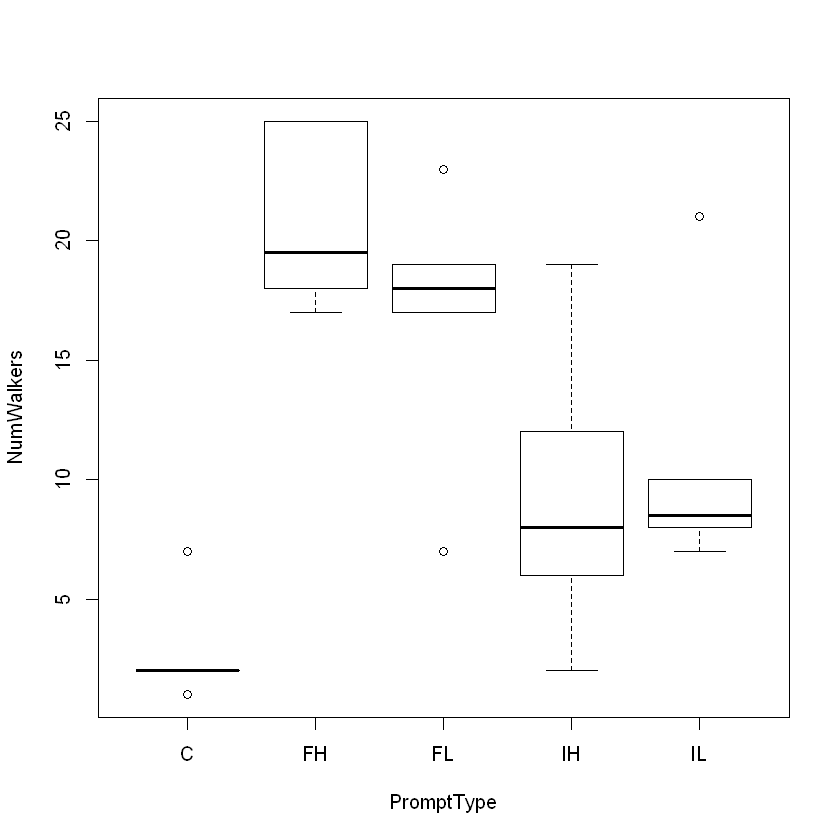

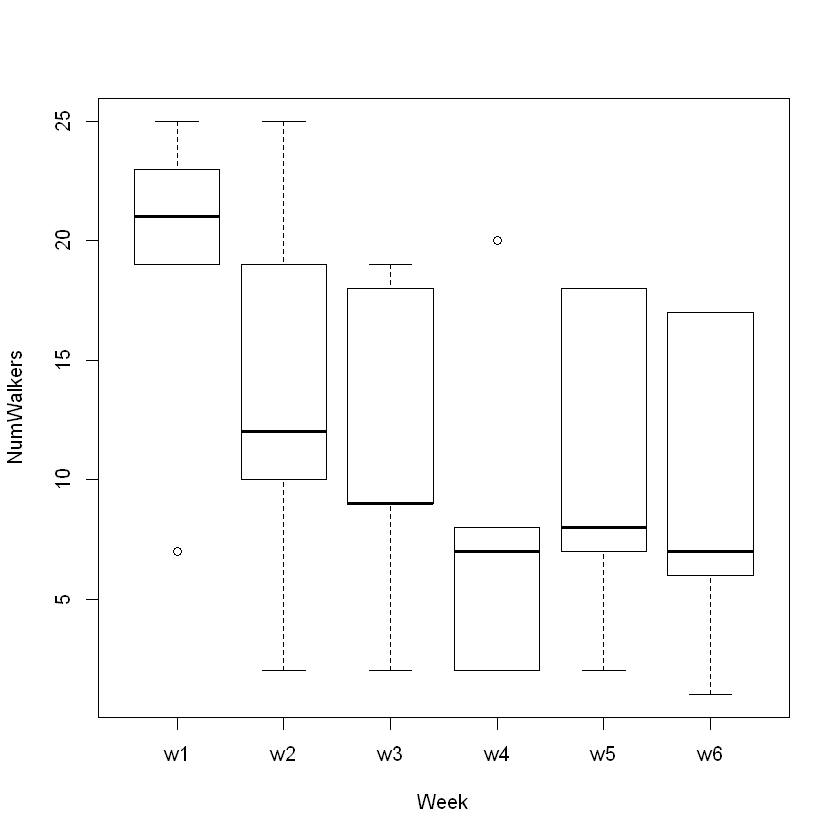

In [8]:
boxplot(NumWalkers~PromptType, data=my_data)
boxplot(NumWalkers~Week, data=my_data)

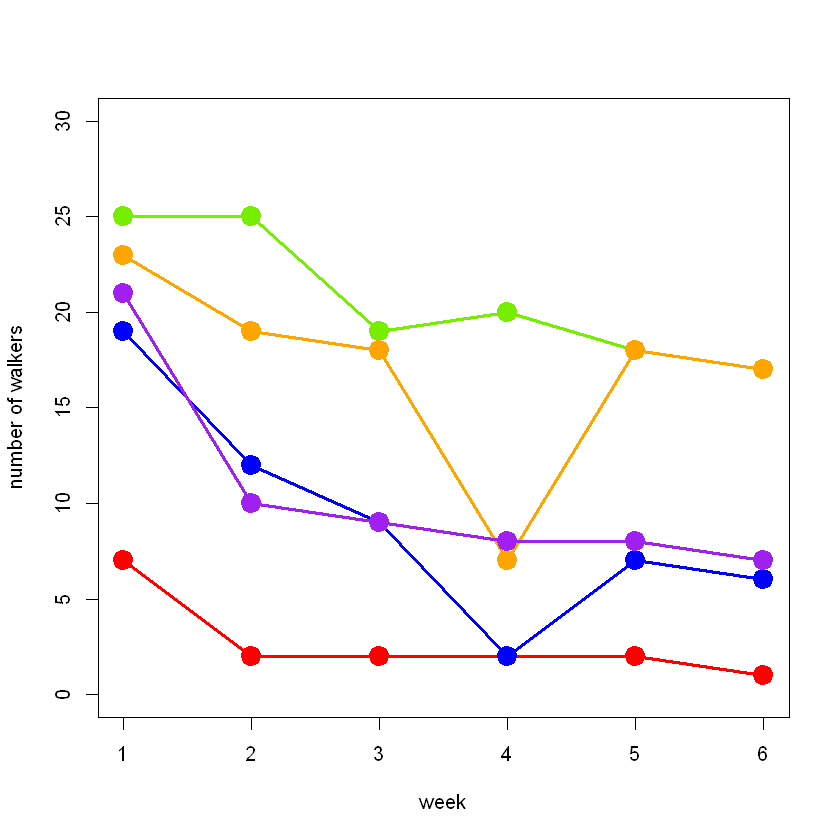

In [9]:
plot(C, type='o', col='red', pch=19, 
     ylim=c(0,30), cex=2, lwd=3, xlab='week', ylab='number of walkers')
lines(FH, type='o', col='chartreuse2', pch=19, 
      cex=2, lwd=3)
lines(FL, type='o', col='orange', pch=19, 
      cex=2, lwd=3)
lines(IH, type='o', col='blue', pch=19, 
      cex=2, lwd=3)
lines(IL, type='o', col='purple', pch=19, 
      cex=2, lwd=3)

In [10]:
aov.res2 <- aov(NumWalkers ~ PromptType + Error(Week/PromptType), data=my_data)
summary(aov.res2)


Error: Week
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  5  386.4   77.28               

Error: Week:PromptType
           Df Sum Sq Mean Sq F value   Pr(>F)    
PromptType  4 1185.0  296.25   39.87 2.92e-09 ***
Residuals  20  148.6    7.43                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

<font color='blue' size=3> Question 2: Compute the pairwise comparisons. What conclusions can you draw?</font>

In [13]:
pairwise.t.test(my_data$'number each week', my_data$'Prompt Group',
                 p.adjust.method = "none",
                 paired=FALSE, pool.sd=FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  my_data$"number each week" and my_data$"Prompt Group" 

   C       FH      FL      IH     
FH 3.7e-06 -       -       -      
FL 0.00061 0.19396 -       -      
IH 0.04116 0.00313 0.03590 -      
IL 0.01265 0.00358 0.05908 0.68637

P value adjustment method: none 

In [15]:
pairwise.t.test(my_data$'number each week', my_data$'Prompt Group',
                 p.adjust.method = "bonferroni",
                 paired=FALSE, pool.sd=FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  my_data$"number each week" and my_data$"Prompt Group" 

   C       FH     FL     IH    
FH 3.7e-05 -      -      -     
FL 0.0061  1.0000 -      -     
IH 0.4116  0.0313 0.3590 -     
IL 0.1265  0.0358 0.5908 1.0000

P value adjustment method: bonferroni 

<font size=3 color='green'>
Notice the difference of parwise comparisons when using bonferroni correction. Every value is multiplied by 10 which will lead to fewer pair means being concluded as significantly different.

<font color='blue' size=5><b> Suggested solutions to Part 5 (datafile ocd) </b></font>

In [88]:
ocd<-read.table(file="../Data/ocd.txt",sep=',',header = T)

<font color='blue' size=3> Question: Davey et al. (2003) looked at processes underlying obsessive compulsive disorder. They asked
different participants in negative, positive or neutral moods to imagine that they were going
on holiday. The participants were then asked to list everything that they should check before
going away. Within each mood group, half of the participants were told to list as many things as
possible within 2 minutes (the ‘time limited’ group), while the other half were told to continue for
as long as they wished (the ‘time unlimited’ group). Test to see whether people in different moods
and with different time constraints make lists of different lengths. Check that the conditions
required for the test are satisfied before discussing the results. </font>

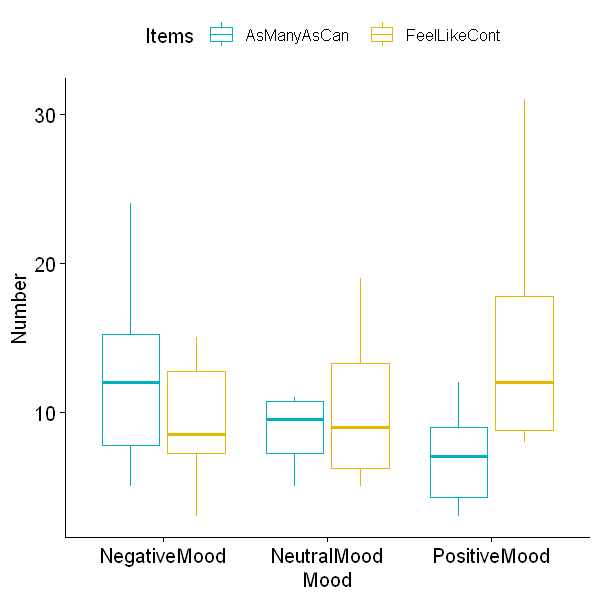

In [86]:
options(repr.plot.width=5, repr.plot.height=5)

ggboxplot(ocd, x = "Mood", y = "Number", color = "Items",
          palette = c("#00AFBB", "#E7B800"))

In [118]:
res.ocd <- aov(Number ~ Mood + Items + Mood:Items, data = ocd)
summary(res.ocd)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Mood         2   34.1   17.07   0.683 0.50922   
Items        1   52.3   52.27   2.093 0.15377   
Mood:Items   2  316.9  158.47   6.345 0.00335 **
Residuals   54 1348.6   24.97                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

<font size=3 color='green'>For $\alpha=0.01$ (conf. level $99\%$), we reject $H_{0}$ for $H_{1}$. Hence, people in different moods and with different time constraints make lists of different lengths.</font> 

<font color='blue' size=5><b> Suggested solutions to Part 6 (datafile langprof) </b></font>

In [107]:
langprof<-read.table(file="../Data/langprof.txt",sep=',',header = T)
head(langprof)

Gender,Country,EnglishScore
<fct>,<fct>,<int>
Male,Europe,10
Male,South-America,33
Male,North-Africa,26
Male,SE-Asia,26
Male,Europe,19
Male,South-America,21


<font color='blue' size=3> Question: The file contains marks achieved by students in a multiple choice test, classified by both gender
and the country in which the test was administered. Use two-way ANOVA to test whether
gender or geographical location has a significant influence on the marks achieved. </font>

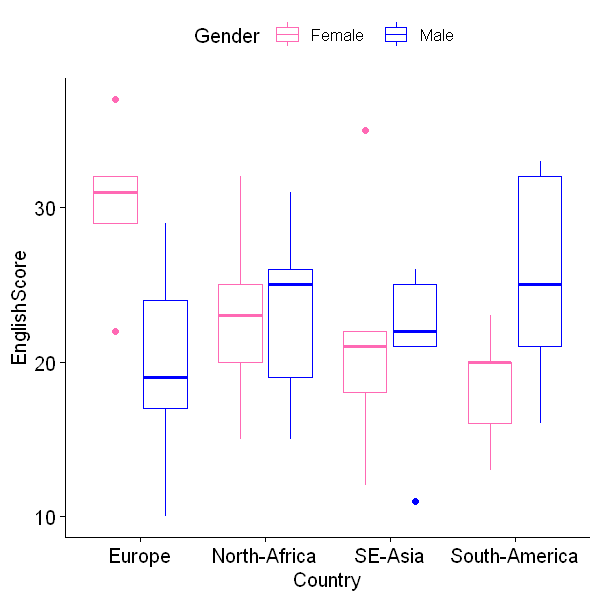

In [108]:
options(repr.plot.width=5, repr.plot.height=5)

ggboxplot(langprof, x = "Country", y = "EnglishScore", color = "Gender",
          palette = c("hotpink", "blue"))

In [119]:
res.langprof <- aov(EnglishScore ~ Gender + Country, data = langprof)
summary(res.langprof)

            Df Sum Sq Mean Sq F value Pr(>F)
Gender       1    9.0    9.02   0.183  0.671
Country      3   79.9   26.63   0.541  0.657
Residuals   35 1722.9   49.23               

In [47]:
#no significant difference in means

<font color='blue' size=5><b> Suggested solutions to Part 7 (datafile schooling) </b></font>

In [1]:
schooling<-read.table(file="../Data/schooling.txt",sep=',',header = T)

<font color='blue' size=3> Question: A researcher investigates the hypothesis that achievement at university is affected by (a) the type
of schooling a student received (home schooling vs public schooling) and (b) whether they come
from a two-parent family or single-parent family. Use two-way ANOVA to investigate whether
either of these variables, or an interaction between them, affects the proportion of questions the
pupils answer correctly in an exam.</font>

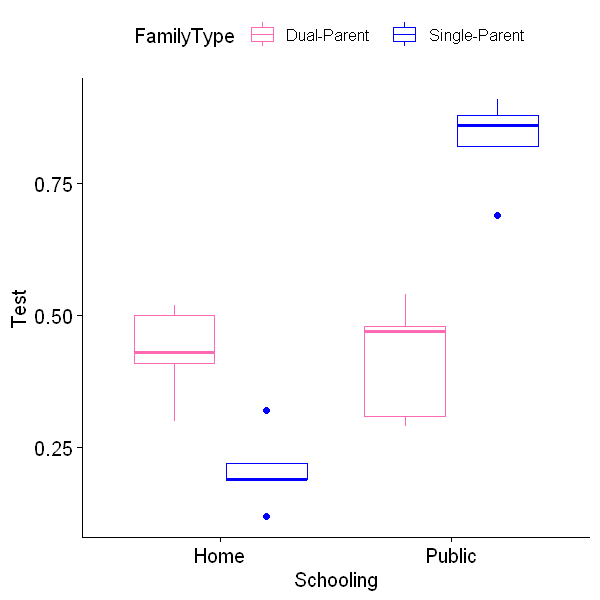

In [122]:
options(repr.plot.width=5, repr.plot.height=5)

ggboxplot(schooling, x = "Schooling", y = "Test", color = "FamilyType",
          palette = c("hotpink", "blue"))

In [120]:
res.school <- aov(Test ~ FamilyType + Schooling + FamilyType:Schooling, data = schooling)
summary(res.school)

                     Df Sum Sq Mean Sq F value   Pr(>F)    
FamilyType            1 0.0451  0.0451    5.54   0.0317 *  
Schooling             1 0.4651  0.4651   57.11 1.15e-06 ***
FamilyType:Schooling  1 0.5088  0.5088   62.47 6.49e-07 ***
Residuals            16 0.1303  0.0081                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

<font size=3 color='green'>
    
At the significance level $\alpha=0.05$, 

we reject $H_{0}$ for $H_{1}$ for all three, that is we conclude that there are significant differences between both the variables and their interaction (since the p-values are smaller than $\alpha$). 



At the significance level $\alpha=0.01$, 

we do not reject $H_{0}$ for $H_{1}$ for the first variable, that is we conclude that family type does not affect exam results

we do reject $H_{0}$ for $H_{1}$ for the second and their interaction, that is schooling does affect exam results. 
</font>

<font color='blue' size=5><b> Suggested solutions to Part 8 (datafile households) </b></font>

In [2]:
households<-read.table(file="../Data/households.txt",sep=',',header = T)

<font color='blue' size=3> Question: The file lists the number of bedrooms people have in their homes and the number of cars they
own, classified by whether or not they live in a rural area or an urban area. Investigate whether
the type of area (rural vs urban) has a significant effect on the number of bedrooms people have
in their homes, and the number of cars they own.</font>

In [36]:
### This question actually wants you to do two one-way ANOVAs

In [44]:
group_by(households, Group) %>%
  summarise(
    count = n(),
    mean = mean(Bedrooms, na.rm = TRUE),
    sd = sd(Bedrooms, na.rm = TRUE)
  )

Group,count,mean,sd
<fct>,<int>,<dbl>,<dbl>
Rural,5,3,1.000000
Urban,5,2,1.224745


In [45]:
res.bed <- aov(Bedrooms ~ Group, data = households)
summary(res.bed)

            Df Sum Sq Mean Sq F value Pr(>F)
Group        1    2.5    2.50       2  0.195
Residuals    8   10.0    1.25               

In [43]:
group_by(households, Group) %>%
  summarise(
    count = n(),
    mean = mean(Cars, na.rm = TRUE),
    sd = sd(Cars, na.rm = TRUE)
  )

Group,count,mean,sd
<fct>,<int>,<dbl>,<dbl>
Rural,5,1,1
Urban,5,2,1


In [46]:
res.car <- aov(Cars ~ Group, data = households)
summary(res.car)

            Df Sum Sq Mean Sq F value Pr(>F)
Group        1    2.5     2.5     2.5  0.153
Residuals    8    8.0     1.0               

<font size=3 color='green'>
    
At the significance level $\alpha=0.1$, we cannot reject the null hypothesis. Therefore, the amount of bedrooms you have or cars you own does not depends on living in a rural or urban house.  
 
</font>